<a href="https://colab.research.google.com/github/dspaez/OpenCV-Introduction/blob/master/Intro_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

#Access Google Drive
drive.mount('/content/drive/')
#Nos permite enlacer Drive con Colab y navegar mediante comandos en sus carpetas usando comandos de linux

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [21]:
%ls

aves_de_presa.jpeg  baby_yoda.jpg  kylo_ren.jpg  mandalorian.jpg  smarties.png


In [0]:
def imshow(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')

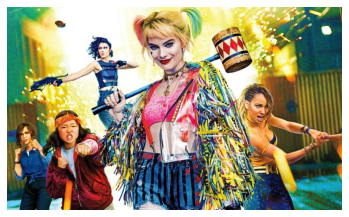

In [22]:
img = cv2.imread("aves_de_presa.jpeg")
imshow(img)

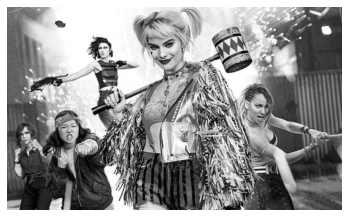

In [23]:
#Transforma la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

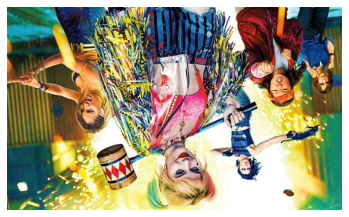

In [24]:
img_rotar_180 = cv2.rotate(img, cv2.ROTATE_180)
imshow(img_rotar_180)

In [31]:
height, width, channels = img.shape
print(height, width, channels)

height, width = gray.shape #Escala de grises no tiene canales
print(height, width)

834 1378 3
834 1378


In [0]:
#Funcion para rotar un imagen cualquier angulo
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

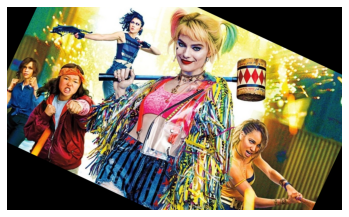

In [35]:
imshow(rotate_image(img, -25))

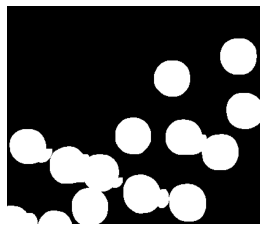

In [38]:
#Erosion y Dilatacion
img = cv2.imread('smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((6,6), np.uint8) # cuadrado en el que vamos a aplicar la transformación de la imagen
img_dilation = cv2.dilate(mask, kernel)
img_erosion = cv2.erode(mask, kernel)

imshow(img_dilation)

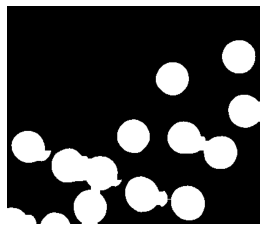

In [40]:
img_opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) # erosion + dilatacion
img_close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # dilatacion + erosion

imshow(img_close)

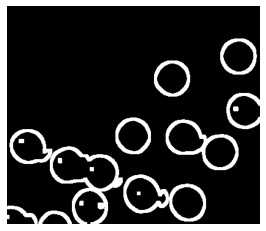

In [42]:
morph_gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
imshow(morph_gradient)

[[[268 118  26]
  [348 238  27]
  [294 320  27]
  [134 328  27]
  [388 170  27]
  [206 210  27]
  [288 214  27]
  [150 272  27]
  [378  82  26]
  [220 306  27]
  [ 32 228  26]
  [100 260  27]]]


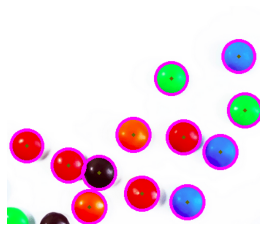

In [49]:
src = cv2.imread('smarties.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

rows = gray.shape[0]

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)

if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(src, center, 1, (0, 100, 100), 3)
    # circle outline
    radius = i[2]
    cv2.circle(src, center, radius, (255, 0, 255), 3)
    
print(circles)
imshow(src)
    

In [53]:
import cv2 as cv
import numpy as np
# Loading exposure images into a list
img_fn = ["HDR/img0.jpg", "HDR/img1.jpg", "HDR/img2.jpg", "HDR/img3.jpg"]
img_list = [cv.imread(fn) for fn in img_fn]
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

# Merge exposures to HDR image
merge_debevec = cv.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy())
merge_robertson = cv.createMergeRobertson()
#hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

# Tonemap HDR image
tonemap1 = cv.createTonemap(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())

# Exposure fusion using Mertens
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

# Convert datatype to 8-bit and save
res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')
#res_robertson_8bit = np.clip(merge_robertson.process(img_list,times)*255, 0, 255).astype('uint8')
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
cv.imwrite("HDR/ldr_debevec.jpg", res_debevec_8bit)
#cv.imwrite("HDR/ldr_robertson.jpg", res_robertson_8bit)
cv.imwrite("HDR/fusion_mertens.jpg", res_mertens_8bit)

True

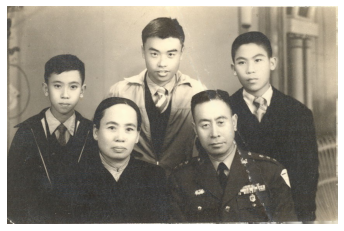

In [55]:
#Ejemplo de Restauración de Imagenes
img = cv2.imread('image_restoration/restaurar.jpg')
mask = cv2.imread('image_restoration/mask.jpg',0)

mask[np.logical_and(mask>0, mask < 246)] = 0 
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

imshow(dst)